In [10]:
from stellargraph import StellarGraph
from stellargraph import StellarDiGraph
import pandas as pd
import os
import sys
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator, FullBatchNodeGenerator
from stellargraph.layer import GCNSupervisedGraphClassification
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph

from stellargraph import datasets

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches = os.listdir("0.England/events_england/")
matches

['2499744',
 '2499728',
 '2499909',
 '2500082',
 '2500004',
 '2500056',
 '2499768',
 '2499903',
 '2499955',
 '2499915',
 '2499823',
 '2499743',
 '2499856',
 '2499920',
 '2499789',
 '2499776',
 '2499887',
 '2500006',
 '2499736',
 '2499886',
 '2500003',
 '2499926',
 '2499791',
 '2499814',
 '2499925',
 '2499854',
 '2499917',
 '2499826',
 '2500029',
 '2499919',
 '2500084',
 '2499720',
 '2499825',
 '2499910',
 '2499811',
 '2500079',
 '2500064',
 '2499801',
 '2500018',
 '2499952',
 '2499762',
 '2499847',
 '2499796',
 '2499975',
 '2499969',
 '2499954',
 '2499812',
 '2499871',
 '2499813',
 '2500095',
 '2499818',
 '2499737',
 '2499844',
 '2500025',
 '2500089',
 '2500074',
 '2499921',
 '2500052',
 '2499849',
 '2499943',
 '2499892',
 '2499862',
 '2499793',
 '2499941',
 '2499804',
 '2499824',
 '2499749',
 '2499730',
 '2500097',
 '2500034',
 '2499734',
 '2499764',
 '2499922',
 '2500069',
 '2499840',
 '2500022',
 '2499990',
 '2499790',
 '2500080',
 '2499755',
 '2499779',
 '2499927',
 '2500058',
 '25

In [5]:
graph_data_list = []
labeled_data_list = []
maTch = 0 
for match_num in matches:
# for match_num in ['2499719']:
    print("MATCH: ",match_num, maTch + 1)
    maTch += 1
    teams = os.listdir("0.England/events_england/"+str(match_num))
    for team in teams:
        shots_edges = os.listdir("0.England/events_england/"+str(match_num)+"/"+str(team)+"/shots/")
        players_df = pd.read_csv("0.England/events_england/"+str(match_num)+"/"+str(team)+"/players/players.csv")
#         print(players_df)
        for i in range(1,len(shots_edges)//2 + 1):
            shots_df = pd.read_csv("0.England/events_england/"+str(match_num)+"/"+str(team)+"/shots/shot_"+str(i)+".csv")
#             print(shots_df)
            shot_result = shots_df.Goal[0]
            passes_df = pd.read_csv("0.England/events_england/"+str(match_num)+"/"+str(team)+"/passes/pass_edge_"+str(i)+".csv")
#             print(passes_df)
            passes_df = passes_df.rename(
                columns={"Source": "source", "Target": "target", "Weight": "weight"}
            )
#             passes_edges = StellarGraph(edges = passes_df)
            name = players_df['Name'].tolist()
            field_time = players_df['Field Time'].tolist()
            position_def = players_df['Position_DEF'].tolist()
            position_fwd = players_df['Position_FWD'].tolist()
            position_gkp = players_df['Position_GKP'].tolist()
            position_mid = players_df['Position_MID'].tolist()
            foot_left = players_df['Foot_left'].tolist()
            foot_right = players_df['Foot_right'].tolist()
            player_node_data = pd.DataFrame(
                {"field_time": field_time, "position_def": position_def, "position_fwd": position_fwd, "position_gkp": position_gkp, "position_mid": position_mid, "foot_left": foot_left, "foot_right": foot_right}, index= name
            )
#             print(player_node_data)
            shot_name = shots_df['Name'].tolist()
            right = shots_df['Right'].tolist()
            left = shots_df['Left'].tolist()
            head_body = shots_df['Head/Body'].tolist()
            opportunity = shots_df['opportunity'].tolist()
            counter_attack = shots_df['counter_attack'].tolist()
            distance_to_goal = shots_df['Distance_to_goal'].tolist()
            goal = shots_df['Goal'].tolist()
            shots_node_data = pd.DataFrame(
                {"right": right, "left": left, "head_body": head_body, "opportunity": opportunity, "counter_attack": counter_attack, "distance_to_goal": distance_to_goal, "goal": goal}, index= shot_name
            )
#             print(shots_node_data)
            try:
#                 hybrid_graph_data = StellarDiGraph({"shots": shots_node_data, "player": player_node_data}, passes_df, edge_type_column="type")
                graph_data = StellarDiGraph({"player": player_node_data}, passes_df)
                graph_data_list.append(graph_data)
                labeled_data_list.append(shot_result)
            except:
                print("cant convert", sys.exc_info()[0])

MATCH:  2499744 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499728 2
MATCH:  2499909 3
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2500082 4
MATCH:  2500004 5
MATCH:  2500056 6
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499768 7
MATCH:  2499903 8
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499955 9
MATCH:  2499915 10
cant convert <class 'TypeError'>
MATCH:  2499823 11
MATCH:  2499743 12
cant convert <class 'TypeError'>
MATCH:  2499856 13
MATCH:  2499920 14
MATCH:  2499789 15
cant convert <class 'TypeError'>
MATCH:  2499776 16
MATCH:  2499887 17
cant convert <class 'TypeError'>
MATCH:  2500006 18
cant convert <class 'TypeError'>
MATCH:  2499736 19
cant convert <class 'TypeError'>
MATCH:  2499886 20
cant convert <class 'TypeError'>
MATCH:  2500003 21
cant convert <class 'TypeError'>
cant convert <cl

MATCH:  2499914 162
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499945 163
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499721 164
MATCH:  2499992 165
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499822 166
MATCH:  2500087 167
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499846 168
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499761 169
MATCH:  2499966 170
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499983 171
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499774 172
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499891 173
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499879 174
MATCH:  2499865 175
cant convert <class 'TypeError'>
MATCH:  2500027 176
MATCH:  2500077 177
cant convert <class 'TypeError'>
cant convert <class 

cant convert <class 'TypeError'>
MATCH:  2500008 321
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499830 322
MATCH:  2499994 323
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499936 324
MATCH:  2499904 325
MATCH:  2500002 326
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499781 327
MATCH:  2499964 328
cant convert <class 'TypeError'>
MATCH:  2499724 329
cant convert <class 'TypeError'>
MATCH:  2499817 330
MATCH:  2499947 331
cant convert <class 'TypeError'>
MATCH:  2499848 332
MATCH:  2499726 333
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499872 334
cant convert <class 'TypeError'>
MATCH:  2499775 335
cant convert <class 'TypeError'>
MATCH:  2499787 336
MATCH:  2499794 337
MATCH:  2499976 338
MATCH:  2500023 339
cant convert <class 'TypeError'>
MATCH:  2499807 340
cant convert <class 'TypeError'>
MATCH:  2499997 341
cant convert <class 'TypeError'>
MATCH:  2499757 342

In [6]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graph_data_list],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

,nodes,edges
count,8103.0,8103.0
mean,13.7,33.5
std,0.5,23.9
min,11.0,1.0
25%,14.0,14.0
50%,14.0,29.0
75%,14.0,50.0
max,14.0,135.0


In [12]:
graph_labels = pd.DataFrame(
    {"label": labeled_data_list}
)
graph_labels.label.value_counts().to_frame()
print(graph_data_list[0].info())

StellarDiGraph: Directed multigraph
 Nodes: 14, Edges: 22

 Node types:
  player: [14]
    Features: float32 vector, length 7
    Edge types: player-default->player

 Edge types:
    player-default->player: [22]
        Weights: range=[1, 2], mean=1.13636, std=0.35125
        Features: none


In [162]:
graph_labels = pd.get_dummies(graph_labels, drop_first=True)

In [13]:
generator = PaddedGraphGenerator(graphs=graph_data_list)
# generator = FullBatchNodeGenerator(graph_data_list, method="gcn")

In [14]:
def create_graph_classification_model(generator):
    gc_model = GCNSupervisedGraphClassification(
        layer_sizes=[64, 64],
        activations=["relu", "relu"],
        generator=generator,
        dropout=0.5,
    )
    x_inp, x_out = gc_model.in_out_tensors()
    predictions = Dense(units=32, activation="relu")(x_out)
    predictions = Dense(units=16, activation="relu")(predictions)
    predictions = Dense(units=1, activation="sigmoid")(predictions)

    # Let's create the Keras model and prepare it for training
    model = Model(inputs=x_inp, outputs=predictions)
    model.compile(optimizer=Adam(0.005), loss=binary_crossentropy, metrics=["acc"])

    return model

In [165]:
epochs = 200  # maximum number of training epochs
folds = 10  # the number of folds for k-fold cross validation
n_repeats = 5  # the number of repeats for repeated k-fold cross validation

In [168]:
es = EarlyStopping(
    monitor="val_loss", min_delta=0, patience=25, restore_best_weights=True
)

In [169]:
def train_fold(model, train_gen, test_gen, es, epochs):
    history = model.fit(
        train_gen, epochs=epochs, validation_data=test_gen, verbose=0, callbacks=[es],
    )
    # calculate performance on the test data and return along with history
    test_metrics = model.evaluate(test_gen, verbose=0)
    test_acc = test_metrics[model.metrics_names.index("acc")]

    return history, test_acc

In [170]:
def get_generators(train_index, test_index, graph_labels, batch_size):
    train_gen = generator.flow(
        train_index, targets=graph_labels.iloc[train_index].values, batch_size=batch_size
    )
    test_gen = generator.flow(
        test_index, targets=graph_labels.iloc[test_index].values, batch_size=batch_size
    )

    return train_gen, test_gen

In [173]:
test_accs = []

stratified_folds = model_selection.RepeatedStratifiedKFold(
    n_splits=folds, n_repeats=n_repeats
).split(graph_labels, graph_labels)

for i, (train_index, test_index) in enumerate(stratified_folds):
    print(f"Training and evaluating on fold {i+1} out of {folds * n_repeats}...")
    train_gen, test_gen = get_generators(
        train_index, test_index, graph_labels, batch_size=30
    )

    model = create_graph_classification_model(generator)

    history, acc = train_fold(model, train_gen, test_gen, es, epochs)

    test_accs.append(acc)

Training and evaluating on fold 1 out of 50...
Training and evaluating on fold 2 out of 50...
Training and evaluating on fold 3 out of 50...
Training and evaluating on fold 4 out of 50...
Training and evaluating on fold 5 out of 50...
Training and evaluating on fold 6 out of 50...
Training and evaluating on fold 7 out of 50...
Training and evaluating on fold 8 out of 50...
Training and evaluating on fold 9 out of 50...
Training and evaluating on fold 10 out of 50...
Training and evaluating on fold 11 out of 50...
Training and evaluating on fold 12 out of 50...
Training and evaluating on fold 13 out of 50...
Training and evaluating on fold 14 out of 50...
Training and evaluating on fold 15 out of 50...
Training and evaluating on fold 16 out of 50...
Training and evaluating on fold 17 out of 50...
Training and evaluating on fold 18 out of 50...
Training and evaluating on fold 19 out of 50...
Training and evaluating on fold 20 out of 50...
Training and evaluating on fold 21 out of 50...
T

In [174]:
print(
    f"Accuracy over all folds mean: {np.mean(test_accs)*100:.3}% and std: {np.std(test_accs)*100:.2}%"
)

Accuracy over all folds mean: 89.7% and std: 0.058%


Text(0, 0.5, 'Count')

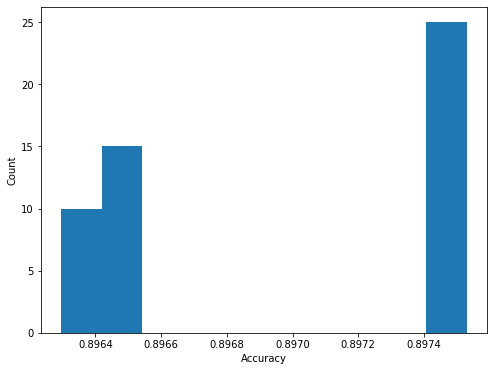

In [179]:
plt.figure(figsize=(8, 6))
plt.hist(test_accs)
plt.xlabel("Accuracy")
plt.ylabel("Count")

passes = pd.read_csv("Graphs/pass.csv")
players = pd.read_csv("Graphs/players.csv")
shots= pd.read_csv("Graphs/shot.csv")

passes = passes.rename(
    columns={"Source": "source", "Target": "target", "Weight": "weight"}
)
passes_edges = StellarGraph(edges=passes)
print(passes_edges.info())

name = players['Name'].tolist()
field_time = players['Field Time'].tolist()
position_def = players['Position_DEF'].tolist()
position_fwd = players['Position_FWD'].tolist()
position_gkp = players['Position_GKP'].tolist()
position_mid = players['Position_MID'].tolist()
foot_left = players['Foot_left'].tolist()
foot_right = players['Foot_right'].tolist()
player_node_data = pd.DataFrame(
    {"field_time": field_time, "position_def": position_def, "position_fwd": position_fwd, "position_gkp": position_gkp, "position_mid": position_mid, "foot_left": foot_left, "foot_right": foot_right}, index= name
)

players_node_features = StellarDiGraph(nodes = player_node_data, edges = passes)
print(players_node_features.info())

shots

shot_name = shots_n['Name'].tolist()
right = shots_n['Right'].tolist()
left = shots_n['Left'].tolist()
head_body = shots_n['Head/Body'].tolist()
opportunity = shots_n['opportunity'].tolist()
counter_attack = shots_n['counter_attack'].tolist()
distance_to_goal = shots_n['Distance_to_goal'].tolist()
goal = shots_n['Goal'].tolist()
shots_node_data = pd.DataFrame(
    {"right": right, "left": left, "head_body": head_body, "opportunity": opportunity, "counter_attack": counter_attack, "distance_to_goal": distance_to_goal, "goal": goal}, index= shot_name
)
shots_node_data

two_nodes_and_two_edges = StellarDiGraph({"shots": shots_node_data, "player": player_node_data}, passes,edge_type_column="type")
print(two_nodes_and_two_edges.info())